# Heart Rate Monitor with HRV Analysis - Demonstration

This notebook demonstrates the usage of the Heart Rate Monitor project with comprehensive Heart Rate Variability (HRV) analysis capabilities.

## What is HRV?

Heart Rate Variability (HRV) measures the variation in time between consecutive heartbeats. It's a key indicator of:
- Cardiovascular health
- Autonomic nervous system function
- Stress and recovery status
- Overall fitness level

In [1]:
# Uncomment below if you need to install dependencies
# pip install -r requirements.txt

# Import required libraries
from main import HeartRateMonitor
import threading
import time
import numpy as np
import matplotlib.pyplot as plt

## HRV-Enhanced Simulated Heart Rate Monitoring

Our simulation now includes realistic physiological variability:
- **Respiratory Sinus Arrhythmia (RSA)**: Heart rate changes with breathing
- **Autonomic fluctuations**: Natural nervous system variations
- **Random physiological changes**: Simulating real cardiac dynamics

In [2]:
# Create a HeartRateMonitor instance with HRV-enabled simulation
monitor = HeartRateMonitor(method='simulate', window_size=200)

print("Starting HRV-enabled heart rate simulation...")
print("Collecting data for 60 seconds...")

# Start data collection thread directly
data_thread = threading.Thread(target=monitor.simulate_heart_rate)
monitor.is_running = True
data_thread.start()

# Collect data for 60 seconds
start_time = time.time()
while time.time() - start_time < 60 and monitor.is_running:
    # Get data from queue
    try:
        while not monitor.data_queue.empty():
            hr = monitor.data_queue.get_nowait()
            monitor.heart_rates.append(hr)
            # Calculate R-R interval
            rr_interval = 60000 / hr
            monitor.rr_intervals.append(rr_interval)
            print(f"Collected: {hr:.1f} BPM, Total: {len(monitor.heart_rates)}", end='\r')
    except:
        pass
    time.sleep(0.1)

# Stop monitoring
monitor.is_running = False
data_thread.join()

# Calculate final HRV metrics
if len(monitor.rr_intervals) >= 10:
    monitor.current_hrv = monitor.calculate_hrv_metrics()

print(f"\nData collection complete! Collected {len(monitor.heart_rates)} readings.")

Starting HRV-enabled heart rate simulation...
Simulating heart rate data with HRV...
Heart rate simulation running...
Collected: 88.2 BPM, Total: 100.4ms
HRV Metrics: SDNN: 68.85ms
Collected: 139.6 BPM, Total: 209.7ms
HRV Metrics: SDNN: 148.57ms
Collected: 140.0 BPM, Total: 308.6ms
HRV Metrics: SDNN: 160.29ms
Collected: 122.2 BPM, Total: 401.2ms
HRV Metrics: SDNN: 148.87ms
Collected: 80.7 BPM, Total: 503.9mss
HRV Metrics: SDNN: 142.71ms
Collected: 48.1 BPM, Total: 6048.2ms
HRV Metrics: SDNN: 240.31ms
Collected: 63.8 BPM, Total: 701.1mss
HRV Metrics: SDNN: 286.95ms
Collected: 95.0 BPM, Total: 801.8ms
HRV Metrics: SDNN: 269.39ms
Collected: 118.0 BPM, Total: 908.5ms
HRV Metrics: SDNN: 259.39ms
Collected: 129.2 BPM, Total: 100.5ms
HRV Metrics: SDNN: 255.43ms
Collected: 83.3 BPM, Total: 110.9mss
HRV Metrics: SDNN: 253.85ms
Collected: 52.8 BPM, Total: 1206.7ms
HRV Metrics: SDNN: 268.49ms
Generated HR: 45.8 BPM, RR: 1309.6ms
Data collection complete! Collected 120 readings.


## HRV Metrics Analysis

Let's analyze the collected HRV data and understand what the metrics mean:

In [3]:
# Extract collected data
hr_data = list(monitor.heart_rates)
rr_data = list(monitor.rr_intervals)
hrv_metrics = monitor.current_hrv

print("=== HEART RATE ANALYSIS ===")
print(f"Total readings: {len(hr_data)}")
print(f"Average HR: {np.mean(hr_data):.2f} BPM")
print(f"HR Range: {np.min(hr_data):.1f} - {np.max(hr_data):.1f} BPM")
print(f"HR Standard Deviation: {np.std(hr_data):.2f} BPM")

print("\n=== HRV ANALYSIS ===")
print(f"Total R-R intervals: {len(rr_data)}")
print(f"Average R-R interval: {np.mean(rr_data):.2f} ms")
print(f"R-R Range: {np.min(rr_data):.1f} - {np.max(rr_data):.1f} ms")

print("\n=== HRV METRICS ===")
print(f"SDNN: {hrv_metrics['SDNN']:.2f} ms")
print(f"RMSSD: {hrv_metrics['RMSSD']:.2f} ms")
print(f"pNN50: {hrv_metrics['pNN50']:.1f}%")

print("\n=== INTERPRETATION ===")
sdnn = hrv_metrics['SDNN']
if sdnn > 150:
    print("SDNN: Excellent heart rate variability")
elif sdnn > 100:
    print("SDNN: Good heart rate variability")
elif sdnn > 50:
    print("SDNN: Average heart rate variability")
else:
    print("SDNN: Low heart rate variability")

rmssd = hrv_metrics['RMSSD']
if rmssd > 40:
    print("RMSSD: Good parasympathetic activity")
elif rmssd > 20:
    print("RMSSD: Moderate parasympathetic activity")
else:
    print("RMSSD: Low parasympathetic activity")

=== HEART RATE ANALYSIS ===
Total readings: 120
Average HR: 97.39 BPM
HR Range: 45.0 - 140.0 BPM
HR Standard Deviation: 29.45 BPM

=== HRV ANALYSIS ===
Total R-R intervals: 200
Average R-R interval: 698.52 ms
R-R Range: 428.6 - 1333.3 ms

=== HRV METRICS ===
SDNN: 268.49 ms
RMSSD: 32.81 ms
pNN50: 9.5%

=== INTERPRETATION ===
SDNN: Excellent heart rate variability
RMSSD: Moderate parasympathetic activity


## Visualizing R-R Intervals

Let's create additional visualizations to understand the HRV data better:

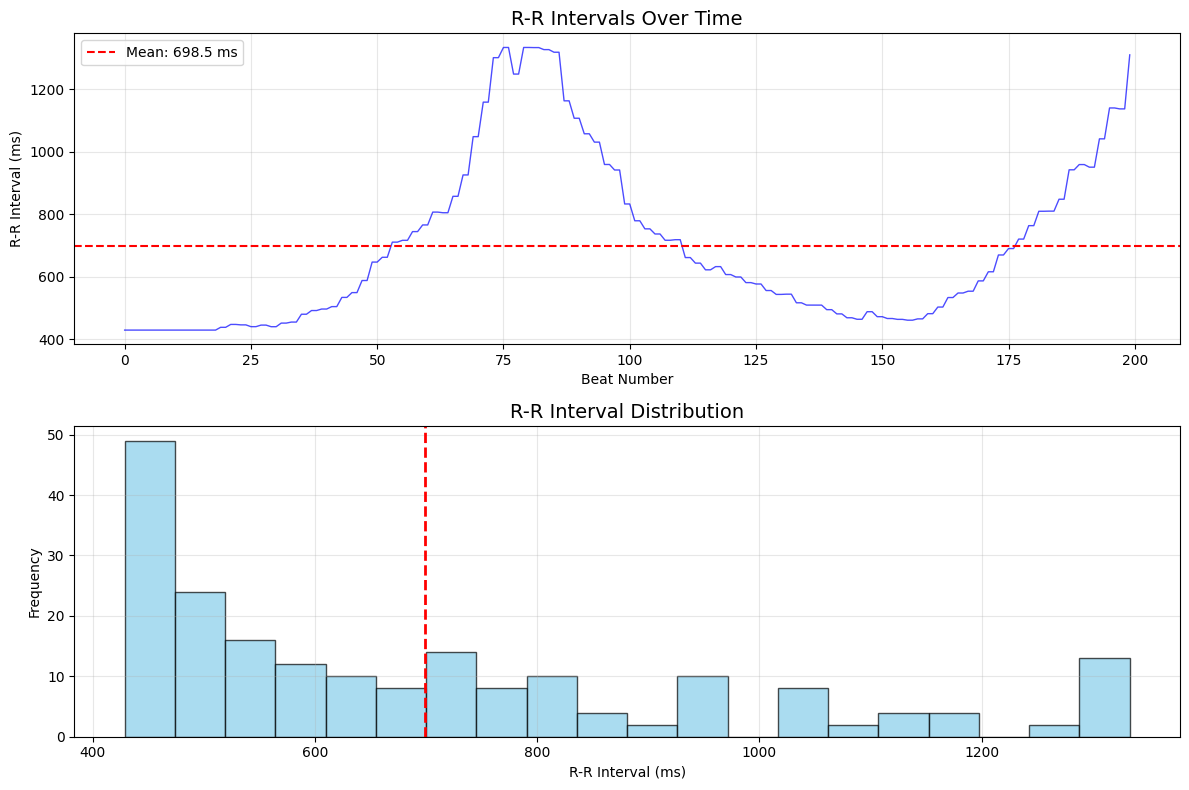

In [6]:
# Create R-R interval visualization
if len(rr_data) > 0:
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
    
    # R-R interval time series
    ax1.plot(rr_data, 'b-', linewidth=1, alpha=0.7)
    ax1.set_title('R-R Intervals Over Time', fontsize=14)
    ax1.set_ylabel('R-R Interval (ms)')
    ax1.set_xlabel('Beat Number')
    ax1.grid(True, alpha=0.3)
    
    # Add mean line
    mean_rr = np.mean(rr_data)
    ax1.axhline(mean_rr, color='red', linestyle='--', 
                label=f'Mean: {mean_rr:.1f} ms')
    ax1.legend()
    
    # R-R interval distribution
    ax2.hist(rr_data, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax2.axvline(mean_rr, color='red', linestyle='--', linewidth=2)
    ax2.set_title('R-R Interval Distribution', fontsize=14)
    ax2.set_xlabel('R-R Interval (ms)')
    ax2.set_ylabel('Frequency')
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No R-R interval data available for visualization")

## Successive Differences Analysis

RMSSD is calculated from successive differences between R-R intervals. Let's visualize this:

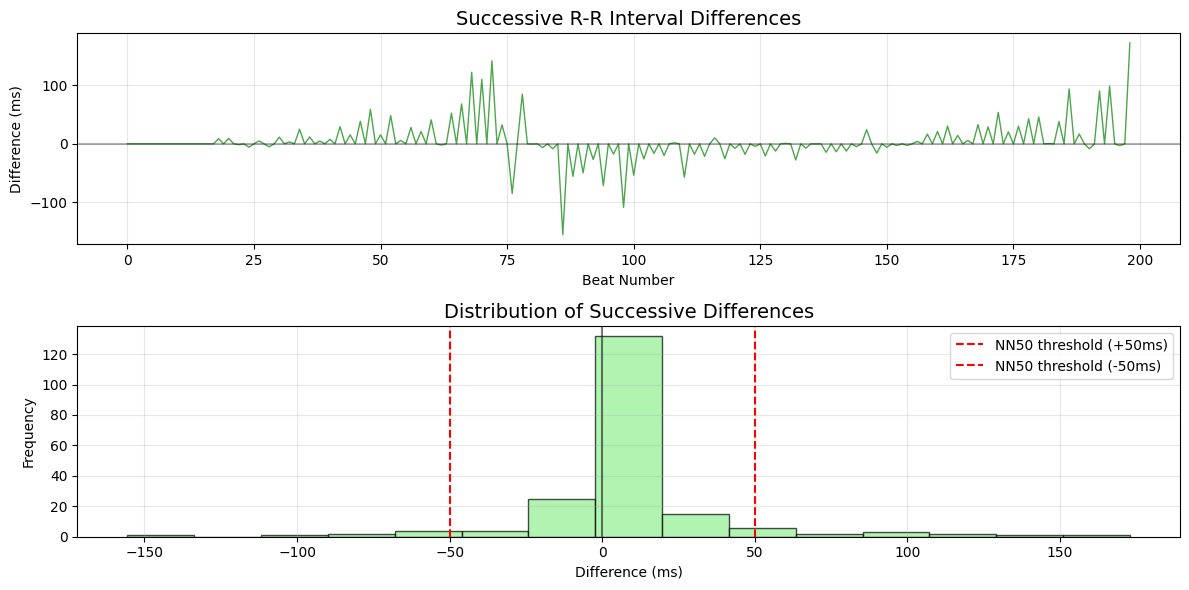


=== NN50 ANALYSIS ===
Total successive differences: 199
Differences > 50ms: 19
pNN50: 9.5%
RMSSD: 32.81 ms


In [7]:
if len(rr_data) > 1:
    # Calculate successive differences
    rr_diff = np.diff(rr_data)
    
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
    
    # Successive differences time series
    ax1.plot(rr_diff, 'g-', linewidth=1, alpha=0.7)
    ax1.set_title('Successive R-R Interval Differences', fontsize=14)
    ax1.set_ylabel('Difference (ms)')
    ax1.set_xlabel('Beat Number')
    ax1.axhline(0, color='black', linestyle='-', alpha=0.3)
    ax1.grid(True, alpha=0.3)
    
    # Distribution of differences
    ax2.hist(rr_diff, bins=15, alpha=0.7, color='lightgreen', edgecolor='black')
    ax2.set_title('Distribution of Successive Differences', fontsize=14)
    ax2.set_xlabel('Difference (ms)')
    ax2.set_ylabel('Frequency')
    ax2.axvline(0, color='black', linestyle='-', alpha=0.5)
    
    # Mark NN50 threshold
    ax2.axvline(50, color='red', linestyle='--', label='NN50 threshold (+50ms)')
    ax2.axvline(-50, color='red', linestyle='--', label='NN50 threshold (-50ms)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Calculate and display NN50 statistics
    nn50_count = np.sum(np.abs(rr_diff) > 50)
    nn50_percentage = (nn50_count / len(rr_diff)) * 100
    
    print(f"\n=== NN50 ANALYSIS ===")
    print(f"Total successive differences: {len(rr_diff)}")
    print(f"Differences > 50ms: {nn50_count}")
    print(f"pNN50: {nn50_percentage:.1f}%")
    print(f"RMSSD: {np.sqrt(np.mean(rr_diff**2)):.2f} ms")
else:
    print("Not enough R-R interval data for successive differences analysis")

## Quick HRV Assessment

For quick testing, you can run a shorter analysis:

In [8]:
# Quick 30-second HRV assessment
quick_monitor = HeartRateMonitor(method='simulate', window_size=100)

print("Running quick 30-second HRV assessment...")

# Start data collection thread directly
quick_thread = threading.Thread(target=quick_monitor.simulate_heart_rate)
quick_monitor.is_running = True
quick_thread.start()

# Collect data for 30 seconds
start_time = time.time()
while time.time() - start_time < 30 and quick_monitor.is_running:
    # Get data from queue
    try:
        while not quick_monitor.data_queue.empty():
            hr = quick_monitor.data_queue.get_nowait()
            quick_monitor.heart_rates.append(hr)
            # Calculate R-R interval
            rr_interval = 60000 / hr
            quick_monitor.rr_intervals.append(rr_interval)
    except:
        pass
    time.sleep(0.1)

# Stop monitoring
quick_monitor.is_running = False
quick_thread.join()

# Calculate final HRV metrics
if len(quick_monitor.rr_intervals) >= 10:
    quick_monitor.current_hrv = quick_monitor.calculate_hrv_metrics()

# Quick results
quick_hr = list(quick_monitor.heart_rates)
quick_rr = list(quick_monitor.rr_intervals)
quick_hrv = quick_monitor.current_hrv

print(f"\n=== QUICK HRV ASSESSMENT ===")
print(f"Duration: 30 seconds")
print(f"Heart rate readings: {len(quick_hr)}")
print(f"Average HR: {np.mean(quick_hr):.1f} BPM")
print(f"SDNN: {quick_hrv['SDNN']:.1f} ms")
print(f"RMSSD: {quick_hrv['RMSSD']:.1f} ms")
print(f"pNN50: {quick_hrv['pNN50']:.1f}%")

print("\nNote: For clinical-grade HRV analysis, longer recordings (5+ minutes) are recommended.")

Running quick 30-second HRV assessment...
Simulating heart rate data with HRV...
Heart rate simulation running...
Generated HR: 90.2 BPM, RR: 665.2ms
HRV Metrics: SDNN: 42.90ms
Generated HR: 123.4 BPM, RR: 486.4ms
HRV Metrics: SDNN: 110.85ms
Generated HR: 140.0 BPM, RR: 428.6ms
HRV Metrics: SDNN: 136.24ms
Generated HR: 117.5 BPM, RR: 510.8ms
HRV Metrics: SDNN: 131.58ms
Generated HR: 69.7 BPM, RR: 860.4mss
HRV Metrics: SDNN: 134.25ms
Generated HR: 45.0 BPM, RR: 1333.3ms
HRV Metrics: SDNN: 304.47ms
Generated HR: 45.0 BPM, RR: 1333.3ms
=== QUICK HRV ASSESSMENT ===
Duration: 30 seconds
Heart rate readings: 60
Average HR: 101.0 BPM
SDNN: 304.5 ms
RMSSD: 26.4 ms
pNN50: 7.1%

Note: For clinical-grade HRV analysis, longer recordings (5+ minutes) are recommended.


## Understanding HRV Metrics

### SDNN (Standard Deviation of NN Intervals)
- Measures overall heart rate variability
- **Normal ranges:**
  - Excellent: >150ms
  - Good: 100-150ms
  - Average: 50-100ms
  - Low: <50ms

### RMSSD (Root Mean Square of Successive Differences)
- Reflects short-term HRV and parasympathetic activity
- **Interpretation:**
  - High values indicate good recovery and relaxation response
  - Low values may suggest stress or overtraining

### pNN50 (Percentage of NN50)
- Percentage of successive R-R intervals differing by >50ms
- **Typical ranges:**
  - Healthy adults: 5-20%
  - Athletes: Often >20%
  - Older adults: Often <5%

### Clinical Applications
- **Cardiovascular risk assessment**
- **Stress and recovery monitoring**
- **Training optimization for athletes**
- **Mental health evaluation**